## $$3조$$

# $$이도원, 이동민, 김효경, 김주환, 이영재$$

In [ ]:
# library import

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [ ]:
import os

os.getcwd()

'/content'

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [253]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/도원결의 시즌2/dowon/도원/titanic.csv', encoding='utf-8', engine='python')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [254]:
# 학습/테스트 데이터 세트 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['Survived'], axis=1),
    df['Survived'],
    test_size=0.3, shuffle=True, stratify=df['Survived']
)

print('x_train : ', x_train.shape,
      '\ny_train : ',y_train.shape,
      '\nx_test : ',x_test.shape,
      '\ny_test : ',y_test.shape,)

x_train :  (623, 11) 
y_train :  (623,) 
x_test :  (268, 11) 
y_test :  (268,)


<br>

## 2. Feature engineering & Feature selection

In [255]:
train_df = pd.concat([x_train, y_train], axis=1)
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,153,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,0
396,397,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,0
205,206,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,0
274,275,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104,105,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S,0
66,67,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,1
663,664,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S,0
294,295,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S,0


In [256]:
train_df.info()


print('\n--------결측치--------')
print('Age : ' , train_df.Age.isna().sum())
print('Cabin : ' , train_df.Cabin.isna().sum())
print('Embarked : ' , train_df.Embarked.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 152 to 844
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Pclass       623 non-null    int64  
 2   Name         623 non-null    object 
 3   Sex          623 non-null    object 
 4   Age          503 non-null    float64
 5   SibSp        623 non-null    int64  
 6   Parch        623 non-null    int64  
 7   Ticket       623 non-null    object 
 8   Fare         623 non-null    float64
 9   Cabin        139 non-null    object 
 10  Embarked     623 non-null    object 
 11  Survived     623 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB

--------결측치--------
Age :  120
Cabin :  484
Embarked :  0


## EDA

### 1. PassengerID

PassengerID 열은 삭제
 

In [250]:
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,C,Q,S
575,3,"Patchett, Mr. George",1,19,0,0,358585,14.5000,NaN,0,0,0,1
364,3,"O'Brien, Mr. Thomas",1,32,1,0,370365,15.5000,NaN,0,0,1,0
467,1,"Smart, Mr. John Montgomery",1,56,0,0,113792,26.5500,NaN,0,0,0,1
159,3,"Sage, Master. Thomas Henry",1,32,8,2,CA. 2343,69.5500,NaN,0,0,0,1
656,3,"Radeff, Mr. Alexander",1,32,0,0,349223,7.8958,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1,"Fortune, Miss. Mabel Helen",0,23,3,2,19950,263.0000,C23 C25 C27,1,0,0,1
699,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",1,42,0,0,348121,7.6500,F G63,0,0,0,1
451,3,"Hagland, Mr. Ingvald Olai Olsen",1,32,1,0,65303,19.9667,NaN,0,0,0,1
480,3,"Goodwin, Master. Harold Victor",1,9,5,2,CA 2144,46.9000,NaN,0,0,0,1


In [257]:
train_df.drop(['PassengerId'], axis=1, inplace=True)

In [258]:
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,0
396,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S,0
501,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,0
205,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,0
274,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...
104,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S,0
66,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,1
663,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S,0
294,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S,0


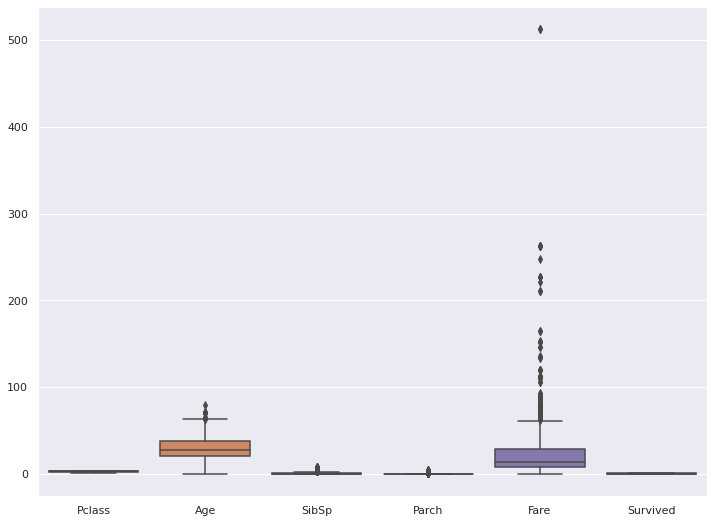

In [259]:
# 연속형 변수 boxplot 확인

import matplotlib.pyplot as plt
import seaborn as sns

temp_df = train_df.copy()
temp_df.drop("Cabin", axis=1, inplace=True)
temp_df = temp_df.select_dtypes(exclude="object")

plt.rcParams['figure.figsize'] = (12, 9)

sns.set_theme()
sns.boxplot(data=temp_df)

plt.show()

### 2. Pclass (객실 클래스) 탐색

**[생존율]**
- 1 등석 : 42.06 %
- 2 등석 : 34.24 %
- 3 등석 : 16.9 %

**결측값 없음**

In [234]:
# 각 클래스 탑승 인원

train_df.Pclass.value_counts().sort_index()

1    152
2    125
3    346
Name: Pclass, dtype: int64

In [235]:
# 클래스별 생존 및 사망 인원

print(' 1등석 생존 및 사망 인원 :\n', train_df.loc[train_df.Pclass == 1, 'Survived'].value_counts().sort_index())
print('\n 2등석 생존 및 사망 인원 :\n', train_df.loc[train_df.Pclass == 2, 'Survived'].value_counts())
print('\n 3등석 생존 및 사망 인원 :\n', train_df.loc[train_df.Pclass == 3, 'Survived'].value_counts())

 1등석 생존 및 사망 인원 :
 0    57
1    95
Name: Survived, dtype: int64

 2등석 생존 및 사망 인원 :
 0    68
1    57
Name: Survived, dtype: int64

 3등석 생존 및 사망 인원 :
 0    259
1     87
Name: Survived, dtype: int64


0    0.4398
Name: Survived, dtype: float64
1    0.3098
Name: Survived, dtype: float64
2    0.1772
Name: Survived, dtype: float64


<Axes: xlabel='Pclass', ylabel='Survived'>

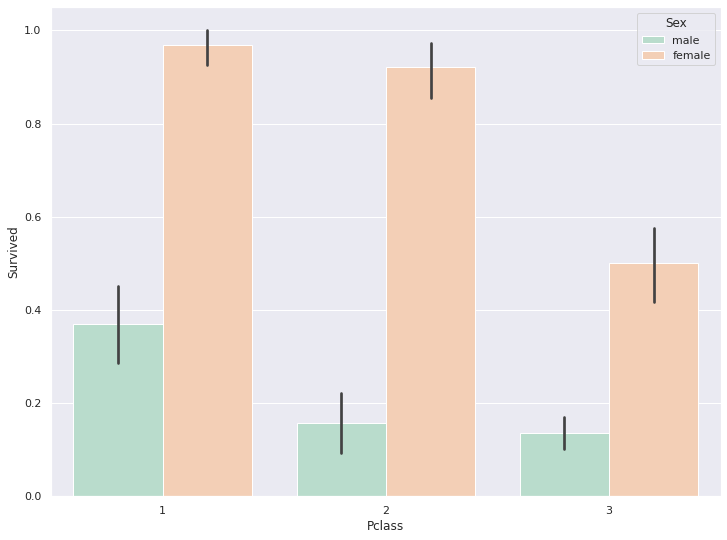

In [236]:
# 클래스별 생존율

pclass_survived_ratio = train_df.groupby('Pclass').Survived.sum().reset_index()

for i in range(1, len(pclass_survived_ratio.Pclass)+1):
    pclass_survived_ratio_i = round(pclass_survived_ratio[pclass_survived_ratio['Pclass']==i]['Survived'] / len(df.loc[df['Pclass']==i]), 4)
    print(pclass_survived_ratio_i)


# 클래스 별 생존율 및 성별에 따른 생존율

sns.barplot(x='Pclass', y="Survived", hue='Sex', data=df, palette="Pastel2")




### 3. 성별

여자의 생존율이 남자보다 더 높다.

남자
- 사망 : 331
- 생존 : 72

여자
- 사망 : 53
- 생존 : 167

**결측값 없음**

In [237]:
# 남성 사망 및 생존 인원
train_df.loc[train_df.Sex == "male", 'Survived'].value_counts()

Series([], Name: Survived, dtype: int64)

In [238]:
# 여성 사망 및 생존 인원

train_df.loc[train_df.Sex == "female", 'Survived'].value_counts().sort_index()

Series([], Name: Survived, dtype: int64)

### 4. Fare

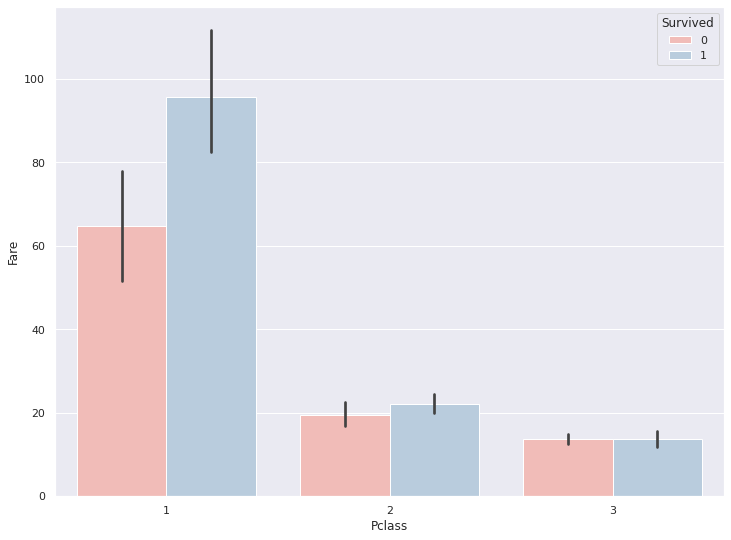

In [239]:
# 클래스 별 평균 요금

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['axes.unicode_minus'] = False

sns.barplot(x='Pclass', y='Fare', data=df, palette="Pastel1", hue="Survived")

plt.show()

In [240]:
# 클래스 별 평균 요금

print('1등석 평균 요금 : $', round(train_df.loc[train_df.Pclass == 1, 'Fare'].mean(), 2))
print('2등석 평균 요금 : $',round(train_df.loc[train_df.Pclass == 2, 'Fare'].mean(), 2))
print('3등석 평균 요금 : $',round(train_df.loc[train_df.Pclass == 3, 'Fare'].mean(), 2))

1등석 평균 요금 : $ 81.83
2등석 평균 요금 : $ 20.54
3등석 평균 요금 : $ 13.51


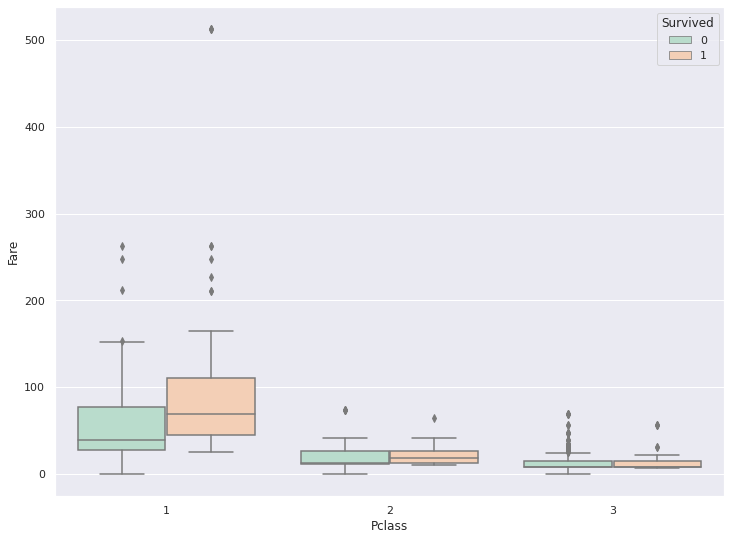

In [241]:
#@title 객실 클래스 별 사망 및 생존자 요금
sns.set_theme()

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['axes.unicode_minus'] = False

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train_df, palette="Pastel2")

plt.show()

In [242]:
# 1 클래스 중간 정착지(탑승 항구)

# train_df.loc[train_df.Pclass == 1, 'Embarked'].value_counts()

### 5. Age column 결측값 탐색

1. 살아남지 못한 경우가 많았다. => (0 : 1 = 80 : 39)
2. 3 클래스 객실에 많이들 머물렀다. => (1 : 2 : 3 = 23 : 5 : 91)
3. 남자가 많았다. => (male : female = 83 : 39)
4. 요금의 평균은 22.15856666666667
5. 기항지는 S(영국 사우스 햄스턴)가 많았다. (S : Q : C = 61 : 31 : 30)
6. 같이 탑승한 형제자매나 배우자는 없는 경우가 많았다. [별첨 #1 참조.]
7. 같이 탑승한 부모나 자녀들은 없는 경우가 많았다. [별첨 #2 참조.]

결측값의 갯수 : 119개

<br>

**[별첨 #1]**

|형제자매나 배우자[SibSp]|합계|
|-|-|
|0|137|
|1|26|
|8|7|
|3|4|
|2|3|


**[별첨 #2]**

|부모 / 자녀 인원 수[Parch]|합계|
|-|-|
|0|157|
|2|12|
|1|8|




In [260]:
# Age 결측값

train_df.loc[train_df.Age.isnull() == True, ]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
274,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q,1
826,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,0
557,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C,0
176,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,0
790,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...
459,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q,0
846,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,0
354,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,0
82,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,1


In [261]:
# Age 결측값인 승객 생사 여부

train_df.loc[train_df.Age.isnull() == True, 'Survived'].value_counts()

0    83
1    37
Name: Survived, dtype: int64

In [262]:
# Age 결측값 Pclass

train_df.loc[train_df.Age.isnull() == True, 'Pclass'].value_counts().sort_index()

1    25
2     9
3    86
Name: Pclass, dtype: int64

In [263]:
# Age 결측값 성별

train_df.loc[train_df.Age.isnull() == True, 'Sex'].value_counts()

male      82
female    38
Name: Sex, dtype: int64

In [264]:
# Age 결측값 Fare 평균

train_df.loc[train_df.Age.isnull() == True, 'Fare'].mean()

23.69076166666667

In [265]:
# Age 결측값 Embarked

train_df.loc[train_df.Age.isnull() == True, 'Embarked'].value_counts()

S    59
Q    39
C    22
Name: Embarked, dtype: int64

In [266]:
# Age 결측값 동승 형제자매 또는 배우자 인원

train_df.loc[train_df.Age.isnull() == True, 'SibSp'].value_counts()


0    98
1    13
8     5
3     2
2     2
Name: SibSp, dtype: int64

In [267]:
# Age 결측값 동승 부모님 또는 어린이 인원수

train_df.loc[train_df.Age.isnull() == True, 'Parch'].value_counts()

0    109
2      7
1      4
Name: Parch, dtype: int64

In [268]:
# x_train Age 평균

np.mean(train_df.Age)

29.749502982107355

#### Age 결측값 승객 특성


1. 사망 : 생존 = $91$ : 35 (생존율 $27.78\ \%$)

2. 1 class : 2 claass : 3 class = 20 : 7 : $99$ (3 클래스 객실 비중 $78.57\ \%$)

3. 남성 : 여성 = $88$ : 38 (남성 비중 $69.84\ \%$)

4. 요금 평균 $ 21.77

5. 기항지는 S(영국 사우스 햄스턴)가 많았다. (**S** : Q : C = **62** : 38 : 26)

6. 동승한 형제자매, 배우자 **없는** 승객 비중 $78.57\ \%$

7. 동승한 부모, 자녀 없는 **승객** 비중 $90.48\ \%$ 


Age 값이 있는 승객 중 위의 특성을 가진 승객군을 참고하여 결측값 처리

-> (or 조건)**사망**한 **3 클래스** 객실 이용 **남성** 중 (and 조건) 동승자가 **없는** 경우

In [269]:
# Age 결측값 처리

## 동승자가 없고
cond_1 = train_df.loc[(train_df.SibSp == 0) & (train_df.Parch == 0)].index

## 3 클래스 객실 이용 (혹은) 남성 (혹은) 사망한 경우
cond_2 = train_df.loc[(train_df.Pclass == 3) | (train_df.Sex == "male") | (train_df.Survived == 0)].index

## 위 두 조건 그룹을 만족하는 승객군
new_train_df = train_df.loc[cond_1 & cond_2]
new_train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,0
396,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S,0
501,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,0
274,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q,1
461,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
82,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,1
527,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
663,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S,0
294,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S,0


In [270]:
# 위 두 조건 그룹을 만족하는 승객군 나이 평균

int(round(new_train_df.Age.mean(), 0))

32

In [271]:
# (train_df)Age 결측치를 위 두 조건 그룹을 만족하는 승객군(new_tain_df) 나이 평균으로 대체

train_df.Age.fillna(int(round(new_train_df.Age.mean(), 0)), inplace=True)

In [272]:
# Age 결측치 0 확인
train_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       484
Embarked      0
Survived      0
dtype: int64

### 6. Ticket column 탐색


In [273]:
# Ticket 중복 확인

train_df.loc[train_df.Ticket.duplicated() == True]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
85,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S,1
627,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S,1
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
169,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,0
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
...,...,...,...,...,...,...,...,...,...,...,...
799,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0
846,3,"Sage, Mr. Douglas Bullen",male,32.0,8,2,CA. 2343,69.5500,NaN,S,0
10,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
736,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,0


In [274]:
train_df.Ticket.value_counts()

3101295               5
CA. 2343              5
113760                4
347088                4
382652                4
                     ..
SOTON/O.Q. 3101306    1
113056                1
367226                1
27042                 1
315090                1
Name: Ticket, Length: 524, dtype: int64

In [275]:
# Ticket 중복값 사례 중 "382652" 확인

train_df.loc[train_df.Ticket == "382652"]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
16,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,0
171,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q,0
787,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q,0
278,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q,0


In [276]:
# 위의 같은 Ticket을 소지한 승객 중 이름이 "Rice"으로 추출해보면 Ticket이 똑같이 나올까?

train_df.loc[train_df.Name.str.contains('Rice')]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
16,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,0
171,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q,0
787,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q,0
278,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q,0


#### Ticket 중복값 처리 결론

Embarked 결측치를 탐색하던 중 Ticket column 중복값이 있다는 사실을 알게 됨.

추측, 동승자끼리 혹은 가족 단위 승객은 같은 Ticket ID를 부여받았다.

따라서, 동승자에 Ticket column 값 중복이 있는 경우이므로, 해당 중복값은 별도 처리하지 않는다.




---



---



### 7. Cabin(객실 번호) 탐색

Cabin column 안쓰는 이유 : 객실 알파벳에 따라 분류했을 때 특정 클래스가  train_test_split 과정에서 균등하게 분리되지 않음. 따라서, x_train과 x_test 데이터 셋 column 갯수가 달라져서 모델링 과정에서 쓸 수가 없다고 판단.

Cabin.value_counts()에서 train_test_split 과정에서 균등히 분리되지 않은 클래스가 있음을 확인

In [277]:
# 1 클래스 선실(Cabin) 값 확인

temp_df = df.loc[df.Pclass == 1]
temp_df.sort_values(by='Cabin').Cabin.value_counts().index[:100]

Index(['C23 C25 C27', 'B96 B98', 'C22 C26', 'C126', 'E24', 'D35', 'B35', 'D20',
       'C2', 'D36', 'B49', 'B77', 'B5', 'C125', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'C124', 'C78', 'B28', 'B22', 'B20', 'E44',
       'E8', 'C68', 'E67', 'C65', 'C83', 'D26', 'C52', 'D17', 'E25', 'D33',
       'C92', 'E33', 'C93', 'B18', 'C123', 'D11', 'D15', 'A10', 'D10 D12',
       'C99', 'C95', 'C91', 'C90', 'C87', 'C86', 'C85', 'D19', 'D46', 'D21',
       'D28', 'E68', 'E63', 'E58', 'E50', 'E49', 'E46', 'E40', 'E38', 'E36',
       'E34', 'E31', 'E17', 'E12', 'D9', 'D7', 'D6', 'D50', 'D49', 'D48',
       'D47', 'D45', 'D37', 'D30', 'C82', 'C45', 'C70', 'A7', 'B42', 'B41',
       'B4', 'B39', 'B38', 'B37', 'B30', 'B3', 'B19', 'B102', 'B101', 'A6',
       'B69', 'A5', 'A36', 'A34', 'A32', 'A31', 'A26', 'A24'],
      dtype='object')

In [278]:
# 1클래스 중 A 객실 승객 요금 평균

temp_df.loc[temp_df.Cabin.str.contains("A") == True, 'Fare'].mean()

39.623886666666664

In [279]:
# 1클래스 중 B 객실 승객 요금 평균

temp_df.loc[temp_df.Cabin.str.contains("B") == True, 'Fare'].mean()

113.50576382978724

In [280]:
# 1클래스 중 C 객실 승객 요금 평균

temp_df.loc[temp_df.Cabin.str.contains("C") == True, 'Fare'].mean()

100.1513406779661

In [281]:
# 1클래스 중 D 객실 승객 요금 평균

temp_df.loc[temp_df.Cabin.str.contains("D") == True, 'Fare'].mean()

63.32428620689656

In [282]:
# 1클래스 중 E 객실 승객 요금 평균

temp_df.loc[temp_df.Cabin.str.contains("E") == True, 'Fare'].mean()

55.740168000000004

In [283]:
# 1클래스 중 T 객실 승객 요금 평균

temp_df.loc[temp_df.Cabin.str.contains("T") == True, 'Fare'].mean()

35.5

In [284]:
# Cabin 빈도수

train_df.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
B51 B53 B55    2
              ..
A7             1
A34            1
E121           1
E34            1
C95            1
Name: Cabin, Length: 113, dtype: int64

In [285]:
# Cabin의 앞글자(ex A, B, C)만 남기기

import numpy as np

def unify_cabin(x):
    result = ""
    if type(x) == float:
        return np.nan
    result = x[0]
    return result

In [286]:
# 

train_df_copy = train_df.copy()
train_df_copy.Cabin = train_df.Cabin.apply(unify_cabin)
cabin_columns = train_df_copy.Cabin.unique()

In [287]:
# Cabin 앞글자 빈도수

train_df_copy.Cabin.value_counts()

C    37
B    33
D    24
E    19
A    13
F     8
G     4
T     1
Name: Cabin, dtype: int64

#### 원핫인코딩

In [288]:
pd.get_dummies(train_df_copy.Cabin)

,A,B,C,D,E,F,G,T
152,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,1,0
274,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
104,0,0,0,0,0,0,0,0
66,0,0,0,0,0,1,0,0
663,0,0,0,0,0,0,0,0
294,0,0,0,0,0,0,0,0


#### Cabin Heatmap



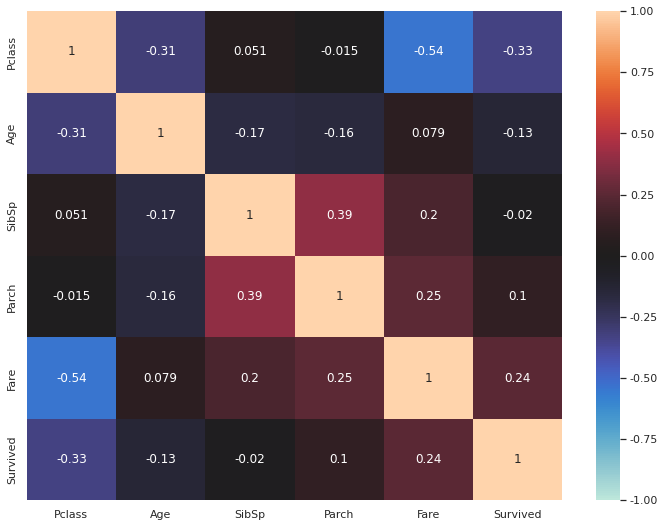

In [289]:
# 변수 간 상관관계 확인

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 9)

sns.set_theme()
sns.heatmap(train_df_copy.select_dtypes(exclude='object').corr(), annot=True, vmin=-1, vmax=1, cmap="icefire")

plt.show()

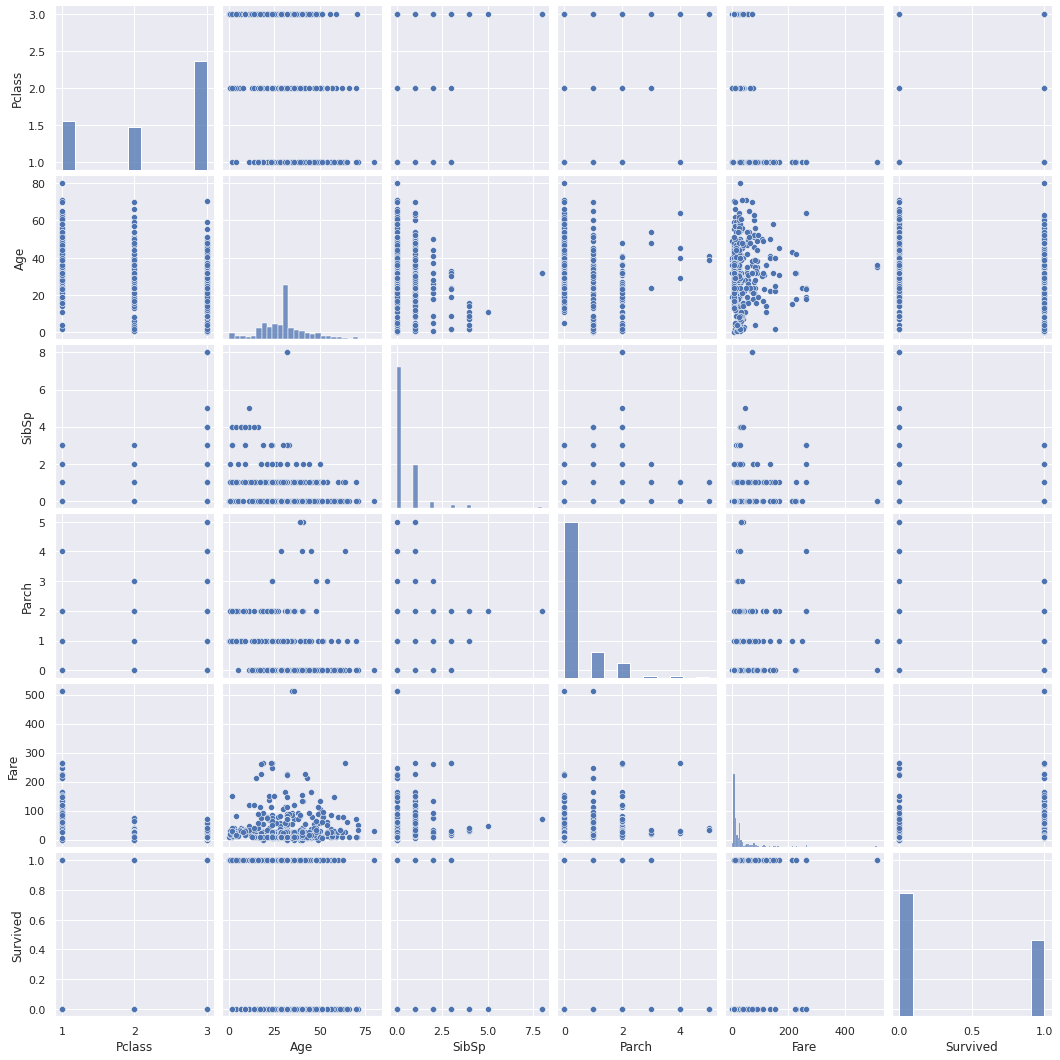

In [290]:
sns.pairplot(data=train_df_copy)

plt.show()

#### Cabin 상관관계 결론

- 히트맵에서 Pclass와 Cabin 간 강한 상관관계가 보인다.


### 8. Embarked 탐색

In [291]:
# Embarked 결측값 

train_df.loc[train_df.Embarked.isnull() == True]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


In [292]:
train_df.Embarked.value_counts()

S    451
C    113
Q     59
Name: Embarked, dtype: int64

#### 원핫 인코딩

In [293]:
pd.get_dummies(train_df.Embarked)

,C,Q,S
152,0,0,1
396,0,0,1
501,0,1,0
205,0,0,1
274,0,1,0
...,...,...,...
104,0,0,1
66,0,0,1
663,0,0,1
294,0,0,1


 9. Name column 탐색

결론적으로 모델의 급격한 성능 저하 유발 요인, Drop




In [294]:
from sklearn.preprocessing import LabelEncoder

def convert_name(name:str) -> str:
    return name.split()[0]

new_train_df = train_df.loc[(train_df.SibSp >= 1) | (train_df.Parch >= 1)]
new_train_df.Name = new_train_df.Name.apply(convert_name)
train_df.drop(new_train_df.index, axis=0, inplace=True)
train_df = train_df.append(new_train_df)

encoder = LabelEncoder()
train_df.Name = encoder.fit_transform(train_df['Name'])
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
152,3,326,male,55.5,0,0,A.5. 11206,8.0500,NaN,S,0
396,3,376,female,31.0,0,0,350407,7.8542,NaN,S,0
501,3,76,female,21.0,0,0,364846,7.7500,NaN,Q,0
274,3,193,female,32.0,0,0,370375,7.7500,NaN,Q,1
461,3,342,male,34.0,0,0,364506,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
10,3,443,female,4.0,1,1,PP 9549,16.7000,G6,S,1
160,3,107,male,44.0,0,1,371362,16.1000,NaN,S,0
736,3,140,female,48.0,1,3,W./C. 6608,34.3750,NaN,S,0
686,3,388,male,14.0,4,1,3101295,39.6875,NaN,S,0


In [295]:
train_df.Name.value_counts()

438    5
85     5
388    5
462    4
415    4
      ..
532    1
156    1
167    1
533    1
107    1
Name: Name, Length: 544, dtype: int64

### 변수 간 상관관계 확인

**[독립변수 간 상관관계를 보이는 변수]**
1.  Fare <=> Pclass : **-0.55**
2.  Sibsp <=> Parch :  0.41
3.  Pclass <=> Age : 0.37
4.  Age <=> Sibsp : -0.31
5.  Sex <=> Parch : -0.25


**[상관계수 범위 별 기준]**
- 절댓값이 1에 가까운 상관계수: **매우 확고한 상관.** 순수학문에 가까운 분야에서는 대부분 이 조건을 요구하나, 사회과학에서는 데이터 조작을 한 번쯤은 의심해봐야 하는 수준이다.
- 절댓값 0.5 정도의 상관계수: **강력한 상관.** 상관관계가 있다고 통계적으로 지지받을 수 있는 수준이다.
- 절댓값 0.2 정도의 상관계수: **미약한(모호한) 상관.** 상관관계가 있다고 장담할 수 없으며, 연구가 더 필요한 수준이나, 사회과학에서는 상관관계가 강력한 것으로 본다.
- 0에 가까운 상관계수 : **대부분의 경우, 상관관계가 없다고 본다.** 후속 연구를 통해 뒤집어질 수도 있지만 일단은 회의적이다. 한편, 2차 방정식 그래프와 비슷한 모양이 될 경우 상관관계는 있으나 상관계수는 0에 가깝게 나온다.


**[참고]**
- 독립성 검사 시
  - 귀무가설 : 두 변수는 독립이다.
  - 대립가설 : 두 변수는 독립이 아니다.

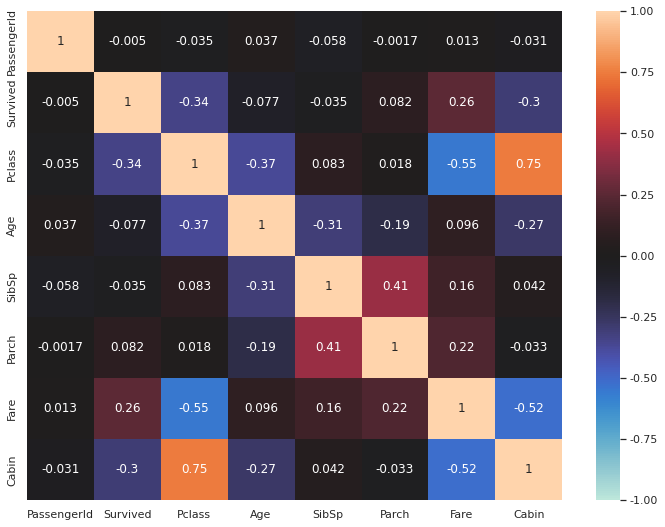

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 9)

sns.set_theme()
sns.heatmap(df_copy.select_dtypes(exclude='object').corr(), annot=True, vmin=-1, vmax=1, cmap="icefire")

plt.show()

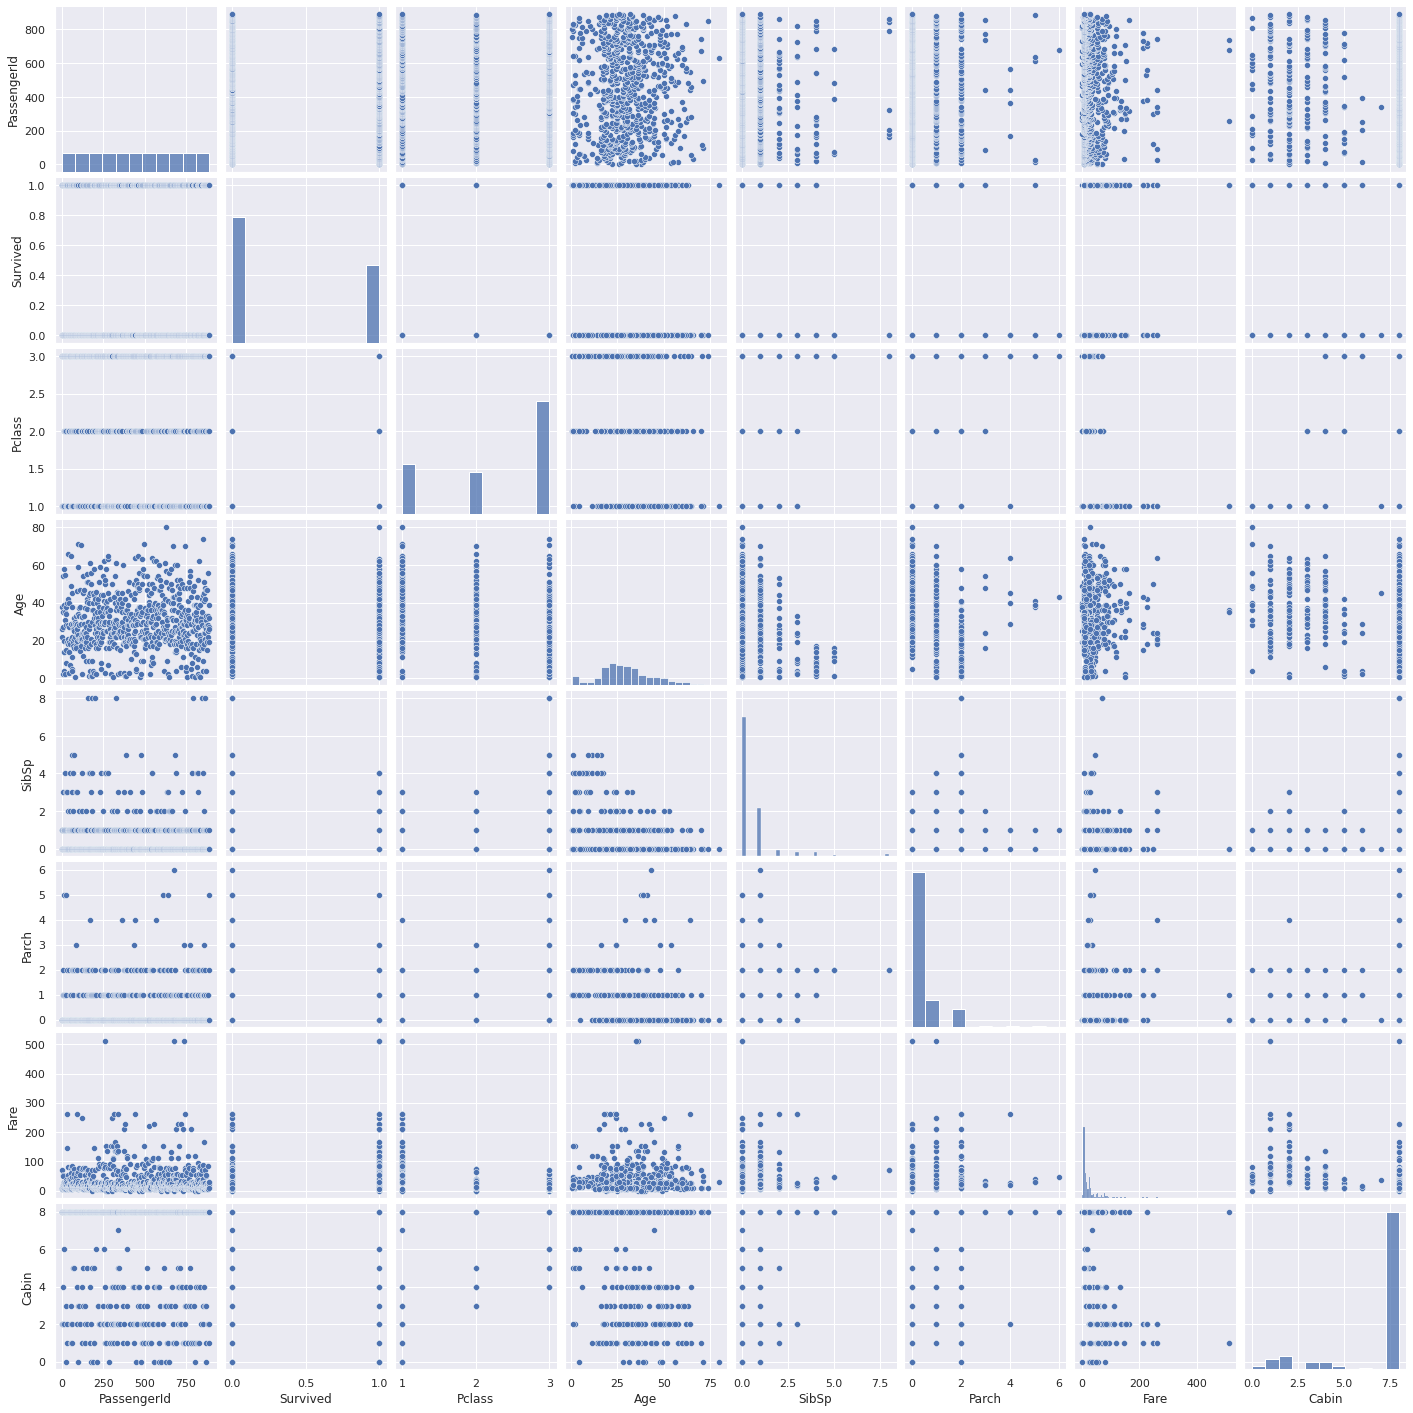

In [298]:
sns.pairplot(data=df_copy)

plt.show()

In [299]:
from sklearn.preprocessing import LabelEncoder

new_df = df.copy()
encoder = LabelEncoder()
new_df.Sex = encoder.fit_transform(new_df.Sex)
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


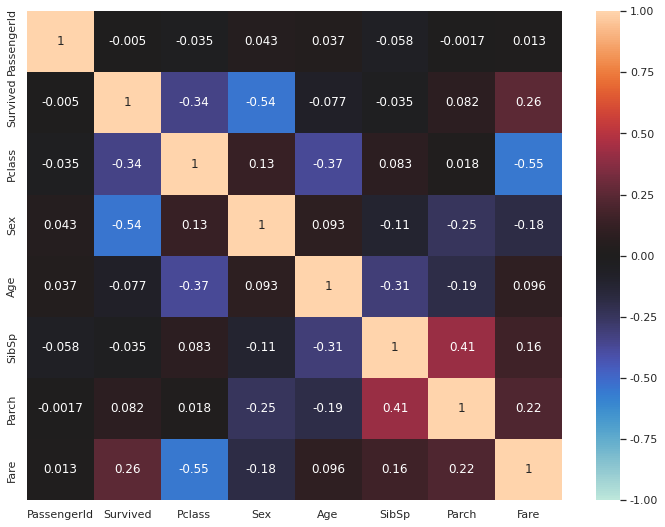

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 9)

# coolwarm, icefire
sns.heatmap(new_df.corr(), annot=True, vmin=-1, vmax=1, cmap="icefire")
plt.show()

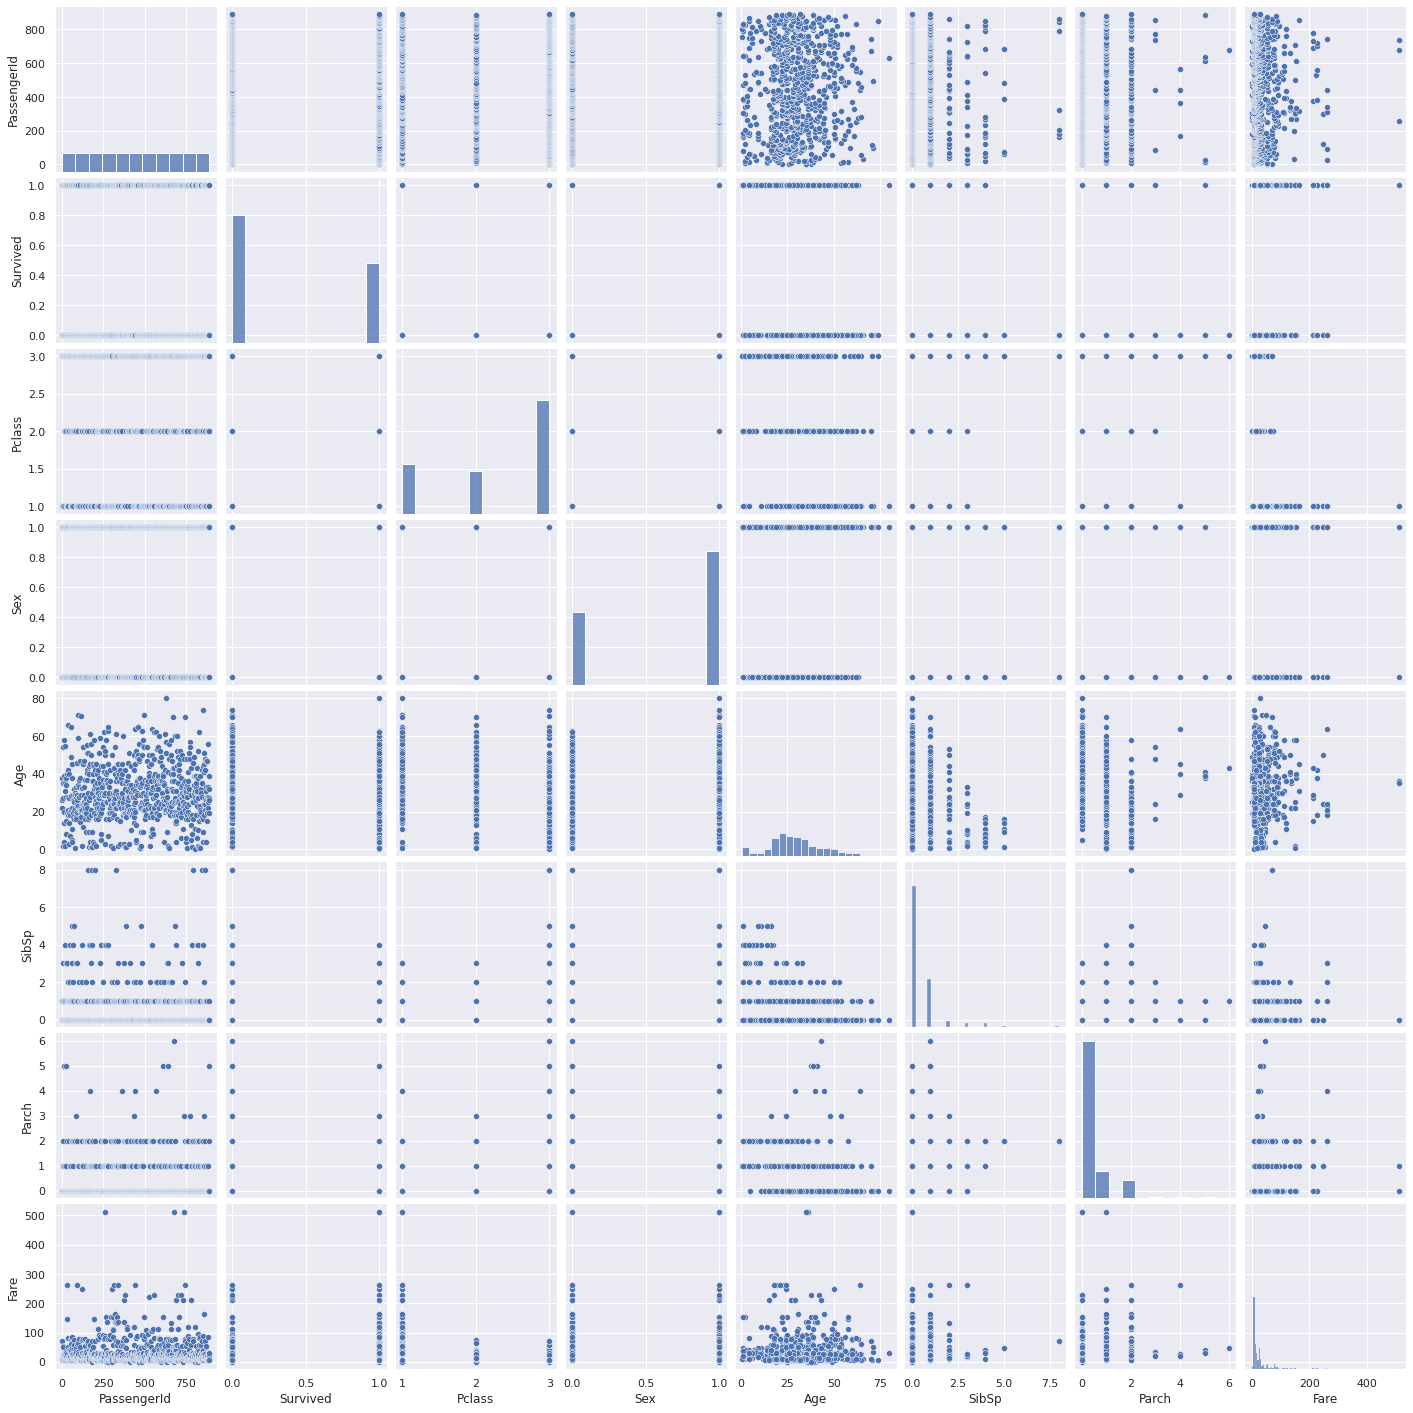

In [301]:
plt.rcParams['figure.figsize'] = (12, 9)

sns.pairplot(data=new_df)

plt.show()

In [302]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [325]:
import statsmodels.formula.api as smi

# df.Age.fillna(np.mean(df.Age), inplace=True)
# df.Embarked.fillna('S', inplace=True)

result = smi.ols(formula="Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + C + Q + S", data=train_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     56.23
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           1.95e-68
Time:                        07:27:03   Log-Likelihood:                -263.60
No. Observations:                 623   AIC:                             545.2
Df Residuals:                     614   BIC:                             585.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0315      0.063     16.354      0.0

In [312]:
result = smi.ols(formula="Survived ~ Pclass + Sex + Age + SibSp + C + Q + S", data=train_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     74.85
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           4.92e-70
Time:                        07:22:43   Log-Likelihood:                -264.26
No. Observations:                 623   AIC:                             542.5
Df Residuals:                     616   BIC:                             573.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0470      0.055     19.187      0.0

#### Fare <=> Pclass 독립성 검정

카이제곱 검정 결과 : 두 변수 **'Fare', 'Pclass'는 독립이** 아니다.

추가적인 **다중공선성 검사가 필요**하다.

In [315]:
# 패키지 위치는 /usr/local/lib/python3.9/dist-packages
from scipy.stats.contingency import chi2_contingency

cross_tab = pd.crosstab(df['Pclass'], df['Fare'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

print("chi2:", chi2)
print("p-value:", p)
print("degree of freedom:", dof)
# print("expected frequencies:\n", expected)

chi2: 1697.8343156429028
p-value: 1.0986166679130083e-131
degree of freedom: 494


#### Fare <=> Pclass 다중공선성 검사

다중공선성 검사 결과, VIF값이 약 1.155881로 매우 낮다.(10이하)

따라서, 두 변수 **'Fare', 'Pclass'사이에는 다중공선성이 존재하지 않는다**고 볼 수 있다.

따라서 회귀 분석 검사 결과가 왜곡될 걱정은 없다.


In [316]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Fare', 'Pclass']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,1.143885,Fare
1,1.143885,Pclass


#### Age <=> Pclass 독립성 검정

카이제곱 검정 결과 : 두 변수 'SibSp', 'Parch'는 독립이 아니다.

추가적으로, **다중공선성 검사가 필요**하다.

In [317]:
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(df['Age'], df['Pclass'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

print("chi2:", chi2)
print("p-value:", p)
print("degree of freedom:", dof)
# print("expected frequencies:\n", expected)

chi2: 284.1706236752667
p-value: 2.6359392253691373e-07
degree of freedom: 174


#### Age <=> Pclass 다중공선성 검사

다중공선성 검사 결과, VIF값이 약 3.110504로 매우 낮다.(10이하)

따라서, 두 변수 **'SibSp', 'Parch'사이에는 다중공선성이 존재하지 않는다**고 볼 수 있다.


In [324]:
X = train_df[['Age', 'Pclass']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,3.085972,Age
1,3.085972,Pclass


#### 다중공선성 검사

In [319]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X = df[['Fare', 'Pclass']]
X = train_df.select_dtypes(exclude="object")
# X.drop(['S', 'Cabin'], axis=1, inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,1.912445,Pclass
1,1.013872,Name
2,1.577450,Sex
3,1.245733,Age
4,1.251684,SibSp
5,1.350997,Parch
6,1.655632,Fare
7,1.734162,Survived
8,8.885611,C
9,5.938781,Q


In [320]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X = df[['Fare', 'Pclass']]
X = train_df.select_dtypes(exclude="object")
X.drop(['S'], axis=1, inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,6.320093,Pclass
1,3.777184,Name
2,3.797086,Sex
3,4.941802,Age
4,1.500063,SibSp
5,1.611571,Parch
6,2.016437,Fare
7,2.001999,Survived
8,1.373977,C
9,1.226545,Q


### 이상치 탐색

- 모든 열의 평균이 대략 0.4 ~ 50 정도에 위치하지만, 최댓값(max)은 Age, Fare column이 각각 80, 512.33으로 높은 수치를 기록함. => 이상치.
- 나이와 요금은 데이터를 잘못 집계한게 아닌 이상 잘못된 값이 들어설 가능성은 없음.
- 이상치를 삭제하지 않고 데이터에 반영할 것을 권장.
- 대신, 해당 이상치들이 분석 결과를 왜곡시킨다는 점은 변함이 없으므로, 알고리즘 선택 시 이상치에 강건한(Robust) 모델 선택이 필요.


In [321]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
?np.percentile

In [322]:
import numpy as np

percent = np.percentile(df.Fare.values, 95)

df.loc[df.Fare >= percent].sort_values(by="Fare")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,D48,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.00,1,0,35273,113.2750,D36,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.00,1,2,113760,120.0000,B96 B98,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.00,2,0,PC 17611,133.6500,NaN,S
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.00,0,0,16966,134.5000,E40,C


### 클래스 불균형 문제

In [323]:
train_df.Survived.value_counts()

0    384
1    239
Name: Survived, dtype: int64

### EDA 소결

**[전처리 필요 여부]**

|Feature|처리 여부|처리 방법|사유|
|-|-|-|-|
|PassengerId|O|drop|index는 학습에 하등 도움 안됨|
|Survived|O|Oversampling / Undersampling|클래스 불균형 문제|
|Pclass|X|-|-|
|Name|O|drop|이름은 전부 다르기에, 도움 안됨|
|Sex|O|LabelEncoding|Object column 처리|
|Age|O|fillna|Age column EDA로 도출된 결과로 결측값 대체|
|SibSp|X|-|-|
|Parch|검증필요|drop|회귀분석 결과 P-Value 초과|
|Ticket|O|drop|클래스의 개수가 무수히 많아 encoding 불가|
|Fare|검증필요|drop|회귀분석 결과 P-Value 초과|
|Cabin|검증 필요|drop or Encoding|다중공선성 존재|
|Embarked|O|One-hot Encoding|잘못된 학습 방지|

<br>

- 다수의 column에서 강력한 상관관계가 보임. => 다중공선성 검증 필요
- 이상치가 존재하나, 정상적인 데이터로 간주하여 훈련 데이터에 반영.

=> 이상치에 강건하고(Robust), Cabin column 미삭제 시, 다중공선성에 취약한 알고리즘(예시 : 회귀 알고리즘)은 피해서 알고리즘 모델을 선택한다.


In [ ]:
df.info()

In [ ]:

new_df

In [306]:
from sklearn.preprocessing import LabelEncoder

import math
import warnings

warnings.filterwarnings("ignore")

# train 데이터 처리
## Sex column 처리
encoder = LabelEncoder()
train_df.Sex = encoder.fit_transform(train_df.Sex)

## Age column 결측값 채우기
cond_1 = train_df.loc[(train_df.SibSp == 0) & (train_df.Parch == 0)].index
cond_2 = train_df.loc[(train_df.Pclass == 3) | (train_df.Sex == "male") | (train_df.Survived == 0)].index
new_train_df = train_df.loc[cond_1 & cond_2]
train_df.Age.fillna(int(round(new_train_df.Age.mean(), 0)), inplace=True)
train_df.loc[train_df.Age % 1 != 0, "Age"] = train_df.loc[train_df.Age % 1 != 0, "Age"].apply(math.floor)
train_df.Age = train_df.Age.astype(int)

## Embarked column 처리 [결측값, 원핫인코딩]
train_df.Embarked.fillna("S", inplace=True)
train_df = pd.concat([train_df, pd.get_dummies(train_df.Embarked)], axis=1)
train_df.drop(['Embarked'], axis=1, inplace=True)